# R Basics: third demo

## Loads

In [1]:
## libraries
library(tidyverse)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.2     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
## Olympic games data
athl <- read_csv("data/athlete_events.csv")

Parsed with column specification:
cols(
  ID = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  Height = col_double(),
  Weight = col_double(),
  Team = col_character(),
  NOC = col_character(),
  Games = col_character(),
  Year = col_double(),
  Season = col_character(),
  City = col_character(),
  Sport = col_character(),
  Event = col_character(),
  Medal = col_character()
)



How many specialities so we have?

In [3]:
## number of specialities
length(unique(athl$Event))

## number of athlets
nrow(athl)

[1] 765

[1] 271116

In [4]:
length(unique(athl$Name))

[1] 134731

In athletics, can we see a change in the age of the athlets over time?

In [5]:
## let's get the list of the sports
unique(athl$Sport)

[1] "Basketball"                "Judo"                     
 [3] "Football"                  "Tug-Of-War"               
 [5] "Speed Skating"             "Cross Country Skiing"     
 [7] "Athletics"                 "Ice Hockey"               
 [9] "Swimming"                  "Badminton"                
[11] "Sailing"                   "Biathlon"                 
[13] "Gymnastics"                "Art Competitions"         
[15] "Alpine Skiing"             "Handball"                 
[17] "Weightlifting"             "Wrestling"                
[19] "Luge"                      "Water Polo"               
[21] "Hockey"                    "Rowing"                   
[23] "Bobsleigh"                 "Fencing"                  
[25] "Equestrianism"             "Shooting"                 
[27] "Boxing"                    "Taekwondo"                
[29] "Cycling"                   "Diving"                   
[31] "Canoeing"                  "Tennis"                   
[33] "Modern Pentathlon"         "Figure Skating"           
[35] "Golf"                      "Softball"                 
[37] "Archery"                   "Volleyball"               
[39] "Synchronized Swimming"     "Table Tennis"             
[41] "Nordic Combined"           "Baseball"                 
[43] "Rhythmic Gymnastics"       "Freestyle Skiing"         
[45] "Rugby Sevens"              "Trampolining"             
[47] "Beach Volleyball"          "Triathlon"                
[49] "Ski Jumping"               "Curling"                  
[51] "Snowboarding"              "Rugby"                    
[53] "Short Track Speed Skating" "Skeleton"                 
[55] "Lacrosse"                  "Polo"                     
[57] "Cricket"                   "Racquets"                 
[59] "Motorboating"              "Military Ski Patrol"      
[61] "Croquet"                   "Jeu De Paume"             
[63] "Roque"                     "Alpinism"                 
[65] "Basque Pelota"             "Aeronautics"

Warning message:
“Removed 1117 rows containing missing values (geom_point).”


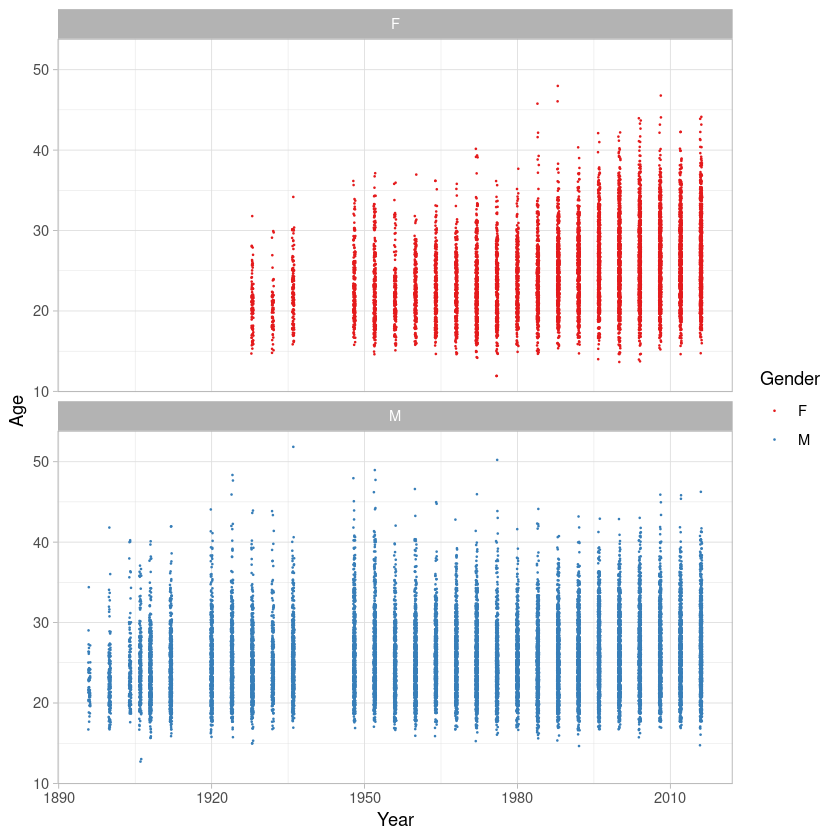

In [6]:
athl %>% 
  filter(Sport == "Athletics") %>% 
  ggplot() + 
  geom_jitter(aes(x = Year, y = Age, col = Sex), width = 0.2, size = 0.1) +
  scale_color_brewer(palette = "Set1", name = "Gender") + 
  facet_wrap(~Sex, ncol = 1) + 
  theme_light()
  

Which, by the way, gives already some interesting result ... apparently the age of participation is rising mainly in females


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 24 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 24 rows containing missing values (geom_point).”


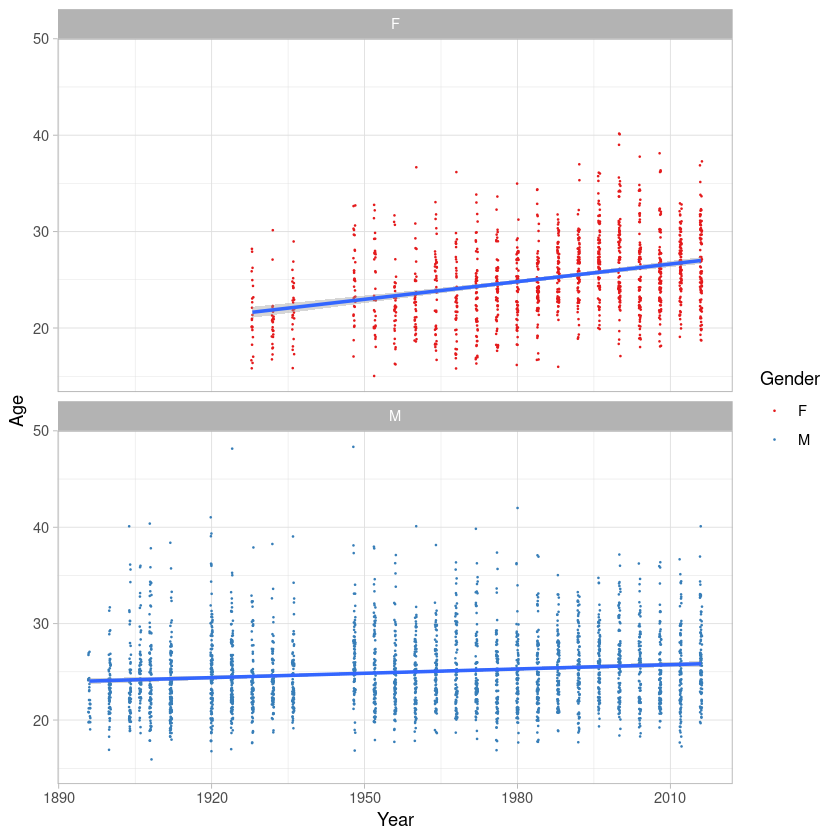

In [7]:
athl %>% 
  filter(Sport == "Athletics") %>% 
  filter(Medal %in% c("Gold","Silver","Bronze")) %>% 
  ggplot() + 
  geom_jitter(aes(x = Year, y = Age, col = Sex), width = 0.2, size = 0.1) +
  geom_smooth(aes(x = Year, y = Age), method = lm) + 
  scale_color_brewer(palette = "Set1", name = "Gender") + 
  facet_wrap(~Sex, ncol = 1) + 
  theme_light()

## Grouping and Summarising

As an easy starting point we start from the iris dataset

In [8]:
## get the data
data(iris)

Now we group it ...

In [9]:
iris %>% 
  group_by(Species)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


Apparently nothing has changed ...

In [10]:
## This performs "on the fly" the mean per group! 

mytable <- iris %>% 
  group_by(Species) %>% 
  summarise(sep = mean(Sepal.Length))

## remember if we not assign the pipe to something the output will be only printed!

`summarise()` ungrouping output (override with `.groups` argument)



In [11]:
## This performs "on the fly" the mean and sample counts per group! 
iris %>% 
  group_by(Species) %>% 
  summarise(sep = mean(Sepal.Length), 
            nsamp = length(Sepal.Length))

`summarise()` ungrouping output (override with `.groups` argument)



Species,sep,nsamp
<fct>,<dbl>,<int>
setosa,5.006,50
versicolor,5.936,50
virginica,6.588,50


Multiple columns can be summarised by using `summarise_at`

In [12]:
iris %>% 
  group_by(Species) %>% 
  summarise_at(vars(`Sepal.Length`:`Petal.Width`),
               .funs = list(sep = mean, 
                            nsamp = length))

Species,Sepal.Length_sep,Sepal.Width_sep,Petal.Length_sep,Petal.Width_sep,Sepal.Length_nsamp,Sepal.Width_nsamp,Petal.Length_nsamp,Petal.Width_nsamp
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
setosa,5.006,3.428,1.462,0.246,50,50,50,50
versicolor,5.936,2.770,4.260,1.326,50,50,50,50
virginica,6.588,2.974,5.552,2.026,50,50,50,50


This type of writing ca be challenging ... the alternative is to rely on pivot_longer ;-)


In [13]:
iris %>% 
  pivot_longer(-Species, names_to = "parameter", values_to = "value") %>% 
  group_by(parameter,Species) %>% 
  summarise(mean = mean(value), 
            sd = sd(value))
  

`summarise()` regrouping output by 'parameter' (override with `.groups` argument)



parameter,Species,mean,sd
<chr>,<fct>,<dbl>,<dbl>
Petal.Length,setosa,1.462,0.1736640
Petal.Length,versicolor,4.260,0.4699110
Petal.Length,virginica,5.552,0.5518947
Petal.Width,setosa,0.246,0.1053856
Petal.Width,versicolor,1.326,0.1977527
Petal.Width,virginica,2.026,0.2746501
Sepal.Length,setosa,5.006,0.3524897
Sepal.Length,versicolor,5.936,0.5161711
Sepal.Length,virginica,6.588,0.6358796


Or, even more intuitive, within "summarise" keep adding columns...

In [15]:
iris %>% 
  group_by(Species) %>% 
  summarise(mean.sl=mean(Sepal.Length), mean.sw=mean(Sepal.Width))

`summarise()` ungrouping output (override with `.groups` argument)



Species,mean.sl,mean.sw
<fct>,<dbl>,<dbl>
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


Rank all athletes based on the # of gold metals

In [14]:
athl %>% 
  filter(Season == "Summer") %>% 
  filter(Medal %in% c("Gold")) %>% 
  group_by(Year,Name,Sport) %>% 
  summarise(medals = length(Medal)) %>% 
  ungroup() %>% 
  filter(medals > 3) %>% 
  arrange(desc(medals))

`summarise()` regrouping output by 'Year', 'Name' (override with `.groups` argument)



Year,Name,Sport,medals
<dbl>,<chr>,<chr>,<int>
2008,"Michael Fred Phelps, II",Swimming,8
1972,Mark Andrew Spitz,Swimming,7
1988,Kristin Otto,Swimming,6
1992,Vitaly Venediktovich Shcherbo,Gymnastics,6
2004,"Michael Fred Phelps, II",Swimming,6
1904,Anton Heida,Gymnastics,5
1920,Nedo Nadi,Fencing,5
1920,"Willis Augustus Lee, Jr.",Shooting,5
1924,Paavo Johannes Nurmi,Athletics,5


Plotting the average age for the athlets over the years ...

`summarise()` ungrouping output (override with `.groups` argument)



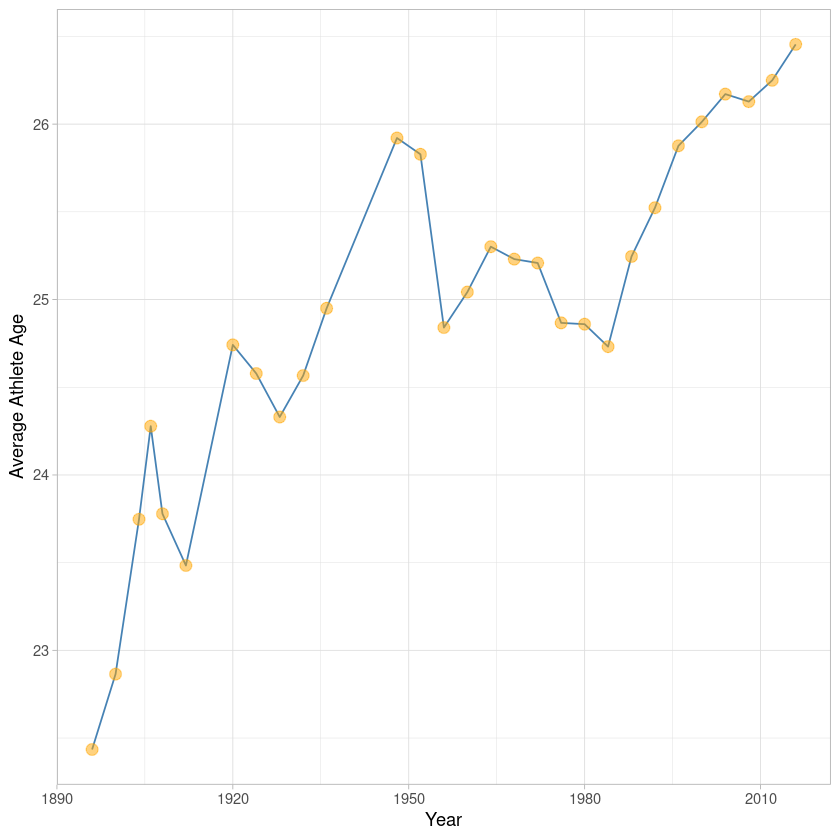

In [15]:
athl %>% 
  filter(Sport == "Athletics") %>% 
  filter(Sex == "M") %>% 
  group_by(Year) %>% 
  summarise(avg_age = mean(Age, na.rm = TRUE)) %>% 
  ungroup() %>% 
  ggplot() + 
  geom_line(aes(x = Year, y = avg_age), col = "steelblue") + 
  geom_point(aes(x = Year, y = avg_age), col = "orange", alpha = 0.5, size = 3) + 
  ylab("Average Athlete Age") + 
  theme_light()

## Code Hints for Assignment 

In [18]:
## If you calculate the mean of a vector containing NAs, you will get NA by default
## to exclude the NAs you have to add an argument to the mean() function
mean(c(1,4,5,6,NA), na.rm = TRUE)

[1] 4

In [19]:
## The list of events is quite long ... to get the "right" name for an event you need
eventlist <- unique(athl$Event)

length(eventlist)

[1] 765

In [20]:
## the function grep("string",vector) tells you the index of the positions where "string" 
## is present in the vector

id100 <- grep("400",eventlist)
id100


## prints the event names which contains "400"
eventlist[id100]


[1]  15  20 115 116 143 189 246 268 278 315 328 350 377

[1] "Swimming Men's 400 metres Freestyle"                              
 [2] "Swimming Men's 400 metres Breaststroke"                           
 [3] "Athletics Men's 400 metres Hurdles"                               
 [4] "Athletics Men's 400 metres"                                       
 [5] "Athletics Men's 4 x 400 metres Relay"                             
 [6] "Swimming Men's 400 metres Individual Medley"                      
 [7] "Athletics Women's 4 x 400 metres Relay"                           
 [8] "Athletics Women's 400 metres"                                     
 [9] "Athletics Women's 400 metres Hurdles"                             
[10] "Swimming Women's 400 metres Individual Medley"                    
[11] "Shooting Men's Military Rifle, 200, 400, 500 and 600 metres, Team"
[12] "Swimming Women's 400 metres Freestyle"                            
[13] "Shooting Men's Free Rifle, 400, 600 and 800 metres, Team"

In [21]:
focusevent <- c("Athletics Men's 400 metres", "Athletics Men's 200 metres")